In [17]:
from data_preprocess import data_preprocess, get_training_data, get_input_data

# load data
data = data_preprocess(one_hot_location=True)

#X_train, y_train = data.drop(columns=["pv_measurement"]), data["pv_measurement"]

features = ["time", "direct_rad:W", "direct_rad_1h:J", "clear_sky_rad:W", "clear_sky_energy_1h:J", "diffuse_rad:W", "sun_elevation:d","is_day:idx", 
            "is_in_shadow:idx", "diffuse_rad_1h:J", "t_1000hPa:K","relative_humidity_1000hPa:p", "air_density_2m:kgm3", "A", "B", "C"]

X_train, targets = get_training_data(data, features)

X_test = get_input_data()

/Users/andreastallvik/Projects/tdt4173-project/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/andreastallvik/Projects/tdt4173-project/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/andreastallvik/Projects/tdt4173-project/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
data.columns

Index(['time', 'pv_measurement', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_speed_u

In [18]:
# add a column for month of the year
X_train['month'] = X_train['time'].apply(lambda x: x.month)
X_train.drop(columns=["time"], inplace=True)
X_test['month'] = X_test['time'].apply(lambda x: x.month)

/var/folders/n0/h43nw_h10zg8v_gzjtqbktp80000gn/T/ipykernel_93177/1526149259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month'] = X_train['time'].apply(lambda x: x.month)
/var/folders/n0/h43nw_h10zg8v_gzjtqbktp80000gn/T/ipykernel_93177/1526149259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=["time"], inplace=True)


/Users/andreastallvik/Projects/tdt4173-project/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreastallvik/Projects/tdt4173-project/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreastallvik/Projects/tdt4173-project/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/andreastallvik/Projects/tdt4173-project/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarni

<Axes: xlabel='month', ylabel='pv_measurement'>

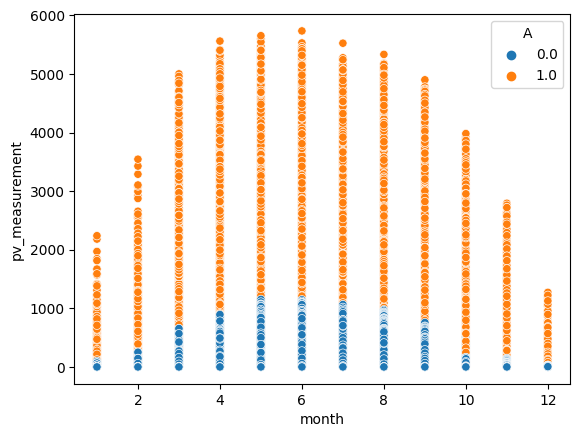

In [23]:
# inspect relationship between month and target
import seaborn as sns

plt_df = X_train.copy()
plt_df["pv_measurement"] = targets

sns.scatterplot(data=plt_df, x="month", y="pv_measurement", hue="A")

In [37]:
features = ["month", "direct_rad:W", "direct_rad_1h:J", "clear_sky_rad:W", "diffuse_rad:W", "sun_elevation:d","is_day:idx", 
            "is_in_shadow:idx", "diffuse_rad_1h:J", "air_density_2m:kgm3", "A"]

In [40]:
# train a single RF and look at feature importance

from sklearn.ensemble import RandomForestRegressor

X = X_train[features].values
y = targets

forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)

RandomForestRegressor()

In [41]:
import pandas as pd

names_list = []
scores_list = []

for name, score, in zip(features, forest_reg.feature_importances_):
    names_list.append(name)
    scores_list.append(score)

feature_importance = pd.DataFrame({"feature": names_list, "relative_importance": scores_list})

feature_importance.sort_values("relative_importance", ascending=False)

,feature,relative_importance
1,direct_rad:W,4.123076e-01
10,A,3.709757e-01
4,diffuse_rad:W,7.693980e-02
2,direct_rad_1h:J,3.029137e-02
9,air_density_2m:kgm3,2.674977e-02
3,clear_sky_rad:W,2.444138e-02
5,sun_elevation:d,2.252274e-02
8,diffuse_rad_1h:J,2.227468e-02
0,month,1.316950e-02
7,is_in_shadow:idx,3.264861e-04


In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(forest_reg, X, y, scoring="neg_mean_squared_error", cv=10)

In [43]:
from evaluate import display_cross_val_scores, training_mse

pred = forest_reg.predict(X)

training_mse(targets, pred)
display_cross_val_scores(scores)

MSE on training data: 11691.988689638454
MSE scores: [518.66119898 495.27787528 494.48549509 230.88592161  94.85902512
  99.19516211  63.84954622  73.44997673 101.31000467 243.81371704]
Mean MSE: 241.5787922835922
Std. dev: 180.70670215392093


In [44]:
from data_preprocess import prepare_submission

predictions = forest_reg.predict(X_test[features].values)

submission = prepare_submission(X_test, predictions)
submission.to_csv('submissions/random_forest_fewer_features.csv', index=False)

In [ ]:
# data transformation steps

# 1. remove some of the features
# 2. standardize
# 3. apply one-hot encoding for location?

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

my_pipeline = Pipeline([
    ("std_scale", StandardScaler())
])

In [7]:
my_pipeline.fit(X_train, targets)

Pipeline(steps=[('std_scale', StandardScaler())])

In [ ]:
# Define categorical and numerical columns in your dataset
categorical_cols = ['categorical_column']
numeric_cols = ['numeric_column']

# Create transformers for one-hot encoding and standardization
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

# Create a ColumnTransformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ])

# Create a pipeline with the defined preprocessor and an optional estimator (e.g., classifier/regressor)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', YourEstimator())])
